In [4]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

import numpy as np
import matplotlib.pyplot as plt
from pdfsolver import PdfSolver, PdfGrid
from Learning import PDElearn
from datamanage import DataIO
from montecarlo import MCprocessing
from visualization import Visualize
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error
import time
from __init__ import *

This code takes a set of monte Carlo simulations of Burgers' equation and sees how well the fit is based on the number of realizations

In [2]:
# Setup
num_realizations = 800
nu = 150 # Discretization in U dimension
distribution = 'CDF'
dMC = 100
MCvec = np.arange(50, num_realizations, dMC)
savefilename = 'burgers0' + str(num_realizations) + '.npy'
case='burgersMC'


In [3]:
coefvec = []
featurenamesvec = []
trainRMSEvec = []
testRMSEvec = []
trainScorevec = []
testScorevec = []

MCprocess = MCprocessing(savefilename)
for idx, MCcount in enumerate(MCvec):
    fu, gridvars, ICparams = MCprocess.buildKDE(nu, partial_data=True, MCcount=MCcount, save=False, plot=False, distribution=distribution)

    grid = PdfGrid(gridvars)
    difflearn = PDElearn(grid=grid, fu=fu, ICparams=ICparams, scase=case, trainratio=0.8, debug=False, verbose=True)
    coef, featurenames, trainRMSE, testRMSE, trainScore, testScore = difflearn.fit_sparse(feature_opt='1storder', \
            variableCoef=True, variableCoefBasis='simple_polynomial', variableCoefOrder=1, \
            use_sindy=True, sindy_alpha=0.001, shuffle=False)
    
    coefvec.append(coef) 
    featurenamesvec.append(featurenames)
    trainRMSEvec.append(trainRMSE)
    testRMSEvec.append(testRMSE)
    trainScorevec.append(trainScore) 
    testScorevec.append(testScore)


Variable coefficient type: simple_polynomial


Sindy iteration : 0

##########

---- Errors ----
Train Score 	= 0.968
Train MSE 	= 2.123e-03
---- Coefficients ----
fu_^{00} 	:	 0.000000000
fu_^{01} 	:	 -0.000000000
fu_^{10} 	:	 0.000000000
fu_^{11} 	:	 -0.000000000
fu_U^{00} 	:	 0.000000000
fu_U^{01} 	:	 0.000022358
fu_U^{10} 	:	 0.000000000
fu_U^{11} 	:	 0.000000000
fu_x^{00} 	:	 -0.165198214
fu_x^{01} 	:	 -0.060706227
fu_x^{10} 	:	 -0.831774559
fu_x^{11} 	:	 -0.000000000
fu_xx^{00} 	:	 -0.000000000
fu_xx^{01} 	:	 -0.000000000
fu_xx^{10} 	:	 0.015101219
fu_xx^{11} 	:	 0.000000000
fu_UU^{00} 	:	 -0.000000000
fu_UU^{01} 	:	 0.000000000
fu_UU^{10} 	:	 -0.001070297
fu_UU^{11} 	:	 -0.000000000
fu_xUU^{00} 	:	 0.000000000
fu_xUU^{01} 	:	 -0.000000000
fu_xUU^{10} 	:	 -0.000000000
fu_xUU^{11} 	:	 -0.002225170
fu_xU^{00} 	:	 -0.000000000
fu_xU^{01} 	:	 -0.000000000
fu_xU^{10} 	:	 -0.001291909
fu_xU^{11} 	:	 -0.019417021
fu_xxU^{00} 	:	 0.001100549
fu_xxU^{01} 	:	 0.000311483
fu_xxU^{10} 	:	 0.



Sindy iteration : 1

##########

---- Errors ----
Train Score 	= 0.980
Train MSE 	= 9.237e-04
---- Coefficients ----
fu_x^{00} 	:	 -0.085716265
fu_x^{01} 	:	 -0.024104558
fu_x^{10} 	:	 -0.900419149
fu_xx^{10} 	:	 0.014869672
---- Sparsity = 4 / 40 

#############################
 
Features option: 1storder
---- Errors ----
Train Score 	= 0.980
Test Score 	= 0.915
Train RMSE 	= 3.039e-02
Test RMSE 	= 1.434e-02
---- Coefficients ----
fu_x^{00} 	:	 -0.085716265
fu_x^{01} 	:	 -0.024104558
fu_x^{10} 	:	 -0.900419149
fu_xx^{10} 	:	 0.014869672
---- Sparsity = 4 / 40 
Variable coefficient type: simple_polynomial


Sindy iteration : 0

##########

---- Errors ----
Train Score 	= 0.989
Train MSE 	= 5.277e-04
---- Coefficients ----
fu_^{00} 	:	 0.000000000
fu_^{01} 	:	 0.000000000
fu_^{10} 	:	 0.000554764
fu_^{11} 	:	 0.000000000
fu_U^{00} 	:	 0.000000000
fu_U^{01} 	:	 0.000000000
fu_U^{10} 	:	 0.000000000
fu_U^{11} 	:	 0.000000000
fu_x^{00} 	:	 -0.093542303
fu_x^{01} 	:	 -0.015567871
fu_x^{10

In [6]:
trainRMSE

0.02509224185226593

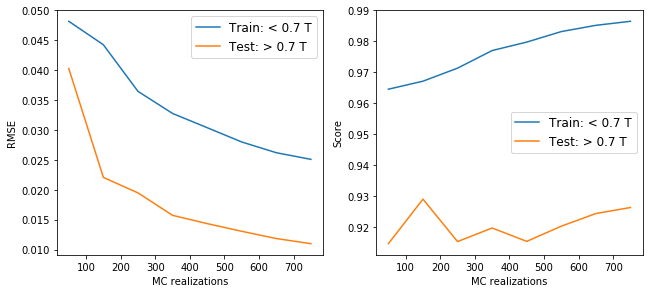

In [29]:
# plot
fig, ax = plt.subplots(1, 2)
ax[0].plot(MCvec, trainRMSEvec)
ax[0].plot(MCvec, testRMSEvec)
#ax[0].title('RMSE')
ax[0].set_xlabel('MC realizations')
ax[0].set_ylabel('RMSE')
ax[0].legend(['Train: < 0.7 T', 'Test: > 0.7 T'])

ax[1].plot(MCvec, trainScorevec)
ax[1].plot(MCvec, testScorevec)
#ax[1].title('score')
ax[1].set_xlabel('MC realizations')
ax[1].set_ylabel('Score')
ax[1].legend(['Train: < 0.7 T', 'Test: > 0.7 T'])

fig.set_size_inches(10.5, 4.5)
fig.savefig('rmse_mcrealizations')

plt.show()



In [10]:
data = {
'coefvec' : coefvec,
'featurenamesvec' : featurenamesvec, 
'trainRMSEvec' : trainRMSEvec,
'testRMSEvec' : testRMSEvec,
'trainScorevec' : trainScorevec,
'testScorevec' : testScorevec,
}
np.save('mc_burgers_cdf_numreal.npy', data)